In [82]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense

In [83]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_hidden_input = np.random.rand(input_size, hidden_size)
        self.weights_hidden_out = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_values = np.dot(X, self.weights_hidden_input) +self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_values)
        self.output_layer_values = np.dot(self.hidden_layer_output,self.weights_hidden_out) + self.bias_output
        self.output_layer_out = self.sigmoid(self.output_layer_values)
        return self.output_layer_out
        
    def backward(self, X, y, predicted):
        dS_out = predicted - y
        dW_out = np.dot(self.hidden_layer_output.T, dS_out)
        db_out = np.sum(dS_out, axis=0, keepdims=True)
        dS_hidden = np.dot(dS_out, self.weights_hidden_out.T) * self.sigmoid_derivative(self.hidden_layer_output)
        dW_hidden = np.dot(X.T, dS_hidden)
        db_hidden = np.sum(dS_hidden, axis=0, keepdims=True)
        return dW_hidden, dW_out, db_hidden, db_out
    def update(self, dW_hidden, dW_out, db_hidden, db_out):
        self.weights_hidden_input -= learning_rate * dW_hidden
        self.weights_hidden_out -= learning_rate * dW_out
        self.bias_hidden -= learning_rate * db_hidden
        self.bias_output -= learning_rate * db_out
    def predict(self, X):
        return self.forward(X)

# Slide

In [84]:
#%% Data preprocessing
# Input dataset (Weight, Size)
inputs = np.array([[120, 10], [180, 12], [90, 8], [110, 7.5], [150, 11], [170,13], [95, 9], [130, 10.5], [200, 14], [100, 8]])
# Labels (one-hot encoded): Eggplant = 1, Carrot = 0
outputs = np.array([[1], [1], [0], [0], [1], [1], [0], [1], [1], [0]])
#%% Normalize the inputs
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)
#%% Convert data to TensorFlow tensors
inputs_scaled = tf.convert_to_tensor(inputs_scaled, dtype=tf.float32)
outputs = tf.convert_to_tensor(outputs, dtype=tf.float32)

In [85]:
#%% Define the model
model = Sequential()
model.add(keras.Input(shape=(inputs_scaled.shape[1],)))
# First layer with 2 neurons and Sigmoid activation
model.add(Dense(2, activation='sigmoid'))
# Second layer with 2 neurons and Sigmoid activation
model.add(Dense(2, activation='sigmoid'))
# Output layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))
#%% Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error’)
#model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [86]:
#%% Training loop
# history = model.fit(inputs_scaled, outputs, epochs=100, verbose=1) # show detailed progress: verbose=0 / 1(default) / 2
history = model.fit(inputs_scaled, outputs, epochs=1000, batch_size=100, verbose=2)
#%% Final output after training
print("Predicted outputs after training:")
predicted_output = model.predict(inputs_scaled)
print(predicted_output)

Epoch 1/1000
1/1 - 1s - 964ms/step - accuracy: 0.5000 - loss: 0.7146
Epoch 2/1000
1/1 - 0s - 48ms/step - accuracy: 0.6000 - loss: 0.7137
Epoch 3/1000
1/1 - 0s - 42ms/step - accuracy: 0.6000 - loss: 0.7128
Epoch 4/1000
1/1 - 0s - 33ms/step - accuracy: 0.6000 - loss: 0.7120
Epoch 5/1000
1/1 - 0s - 32ms/step - accuracy: 0.6000 - loss: 0.7113
Epoch 6/1000
1/1 - 0s - 31ms/step - accuracy: 0.6000 - loss: 0.7105
Epoch 7/1000
1/1 - 0s - 31ms/step - accuracy: 0.6000 - loss: 0.7098
Epoch 8/1000
1/1 - 0s - 33ms/step - accuracy: 0.6000 - loss: 0.7092
Epoch 9/1000
1/1 - 0s - 35ms/step - accuracy: 0.6000 - loss: 0.7085
Epoch 10/1000
1/1 - 0s - 32ms/step - accuracy: 0.6000 - loss: 0.7079
Epoch 11/1000
1/1 - 0s - 48ms/step - accuracy: 0.6000 - loss: 0.7074
Epoch 12/1000
1/1 - 0s - 43ms/step - accuracy: 0.6000 - loss: 0.7068
Epoch 13/1000
1/1 - 0s - 28ms/step - accuracy: 0.6000 - loss: 0.7063
Epoch 14/1000
1/1 - 0s - 33ms/step - accuracy: 0.6000 - loss: 0.7058
Epoch 15/1000
1/1 - 0s - 48ms/step - accur

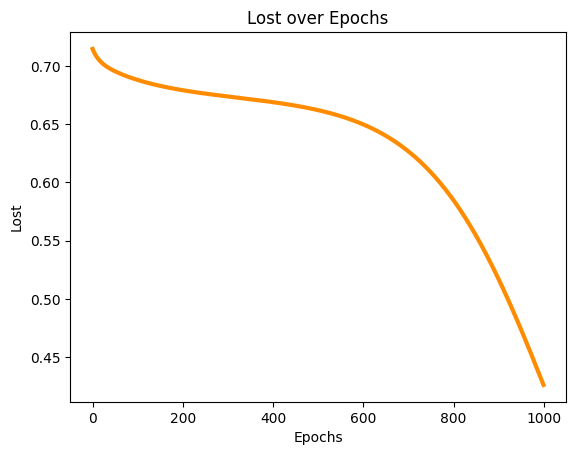

In [87]:
#%% Plotting the cost over epochs
loss_history = history.history['loss']
plt.plot(loss_history, lw=3, color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Lost')
plt.title('Lost over Epochs')
plt.show()

# Tren Lop

In [89]:
#%% Data preprocessing
# Input dataset (Weight, Size)
inputs = np.array([[120, 10], [180, 12], [90, 8], [110, 7.5], [150, 11], [170,13], [95, 9], [130, 10.5], [200, 14], [100, 8]])
# Labels (one-hot encoded): Eggplant = 1, Carrot = 0
outputs = np.array([[1], [1], [0], [0], [1], [1], [0], [1], [1], [0]])
#%% Normalize the inputs
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)
# inputs_scaled = input/np.max(inputs,axis=0)
#%% Convert data to TensorFlow tensors
# inputs_scaled = tf.convert_to_tensor(inputs_scaled, dtype=tf.float32)
# outputs = tf.convert_to_tensor(outputs, dtype=tf.float32)

In [90]:
epochs=1000
learning_rate=0.1

In [91]:
input_size=12
hidden_size=8
output_size=1

In [92]:
model=SimpleNeuralNetwork(inputs_scaled.shape[1],2,outputs.shape[1])

In [99]:
cost_history=[]
for epoch in range(epochs):
    predicted= model.forward(inputs_scaled)

    cost=-np.mean(np.sum(outputs*np.log(predicted)+(1-outputs)*np.log(1-predicted),axis=1))
    cost_history.append(cost)
    dW1, dW2, db1, db2 = model.backward(inputs_scaled, outputs, predicted)
    model.update(dW1, dW2, db1, db2)
    if epoch %100==0:
        print(f'epoch {epoch},Cost: {cost}')

epoch 0,Cost: 0.004045079872191253
epoch 100,Cost: 0.003629578666732211
epoch 200,Cost: 0.0032895595032470734
epoch 300,Cost: 0.003006385275775151
epoch 400,Cost: 0.002767048981981227
epoch 500,Cost: 0.0025622060112455323
epoch 600,Cost: 0.0023849752595523814
epoch 700,Cost: 0.0022301808393116644
epoch 800,Cost: 0.0020938568083588064
epoch 900,Cost: 0.001972914537817459


In [100]:
print('predict outputs after training: ')
predicted_output=model.predict(inputs_scaled)
print(predicted_output)

predict outputs after training: 
[[0.99496214]
 [0.99972131]
 [0.00191201]
 [0.00217652]
 [0.99970567]
 [0.99972147]
 [0.00557615]
 [0.99947475]
 [0.99972155]
 [0.00225597]]


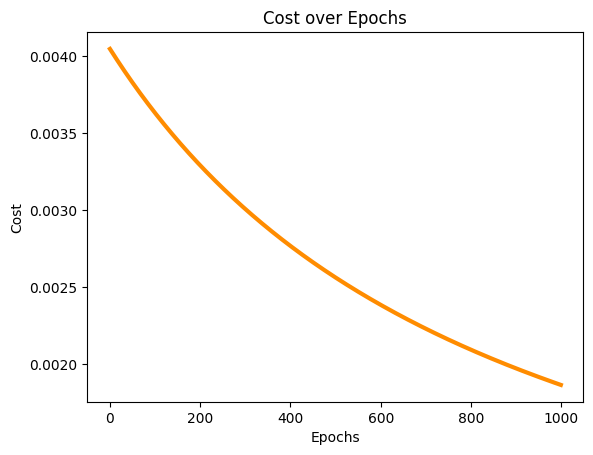

In [101]:
plt.plot(cost_history, lw=3, color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost over Epochs')
plt.show()

In [102]:
predicted_probs=predicted_output.reshape(-1)
real_values=outputs.reshape(-1)
predicted_labels=(predicted_probs>=0.8).astype(int)

In [103]:
accuracy = accuracy_score(real_values, predicted_labels)
precision = precision_score(real_values, predicted_labels)
recall = recall_score(real_values, predicted_labels)
f1 = f1_score(real_values, predicted_labels)
print(accuracy,precision, recall,f1)

1.0 1.0 1.0 1.0
